<a href="https://colab.research.google.com/github/VANISAIDEEPIKA/WEEK-3-Carbon-Emissions-Prediction-/blob/main/notebooks_colab/_Final_Climate_Analysis_Week1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📅 Week 1 Summary: Data Preparation
- 🔹 Downloaded raw climate change dataset
- 🔹 Inspected and cleaned missing/inconsistent values
- 🔹 Saved cleaned dataset as `data_cleaned.csv`


## 📥 Load Dataset

# **Prediction of CO2 emissions from country-specific data**
***
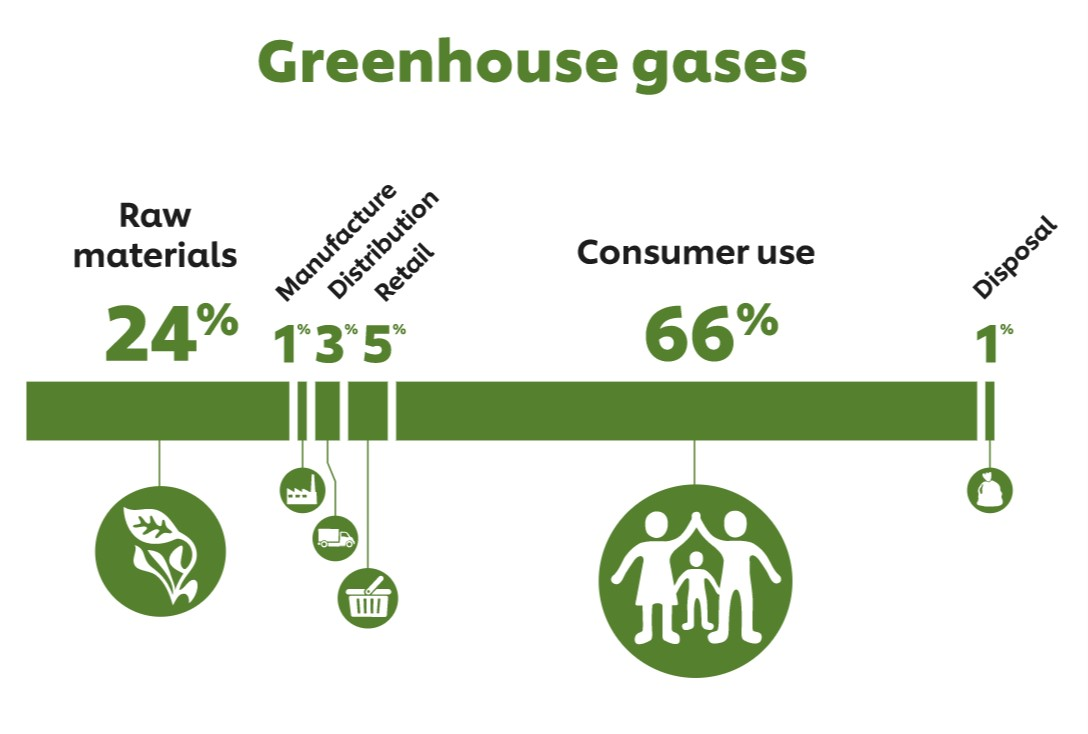

## Problem Statement:

Analysis of country-specific data and development of machine learning models in order to predict CO2 emissions from country parameters. The project uses the publicly available dataset Climate Change Data from the World Bank Group, which provides data on the vast majority of countries over a range of years for parameters such as:

* country: the vast majority of countries worldwide
* year: ranging from 1990 to 2011
* various emissions of greenhouse gases such as CO2, CH4, N2O, others
* population-specific parameters: population count, urban population, population growth, etc.
* country economic indicators: GDP, GNI, Foreign Direct Investment, etc.
* land-related parameters: cereal yield, agricultural land, Nationally terrestrial protected areas, etc.
* climate data: precipitations, national disasters, etc.
* energy use
* counts of certain types of medical personnel
* etc.

The project is divided into two stages:

1. Data cleaning and preparation
2. Data exploration and Predictive analysis

Each of the stages is described in a separate Jupyter Notebook(.ipynp file) and a derived pdf file.

***

## Stage 1: Data cleaning and preparation

***

#### Notebook Contents:
0. Introduction - project and notebook summary, notes on the data source
1. Notebook setup - libraries and data import
2. Global data overview
3. Definition of the initial project goals
3. Data cleaning
    - dealing with missing values
    - transformation of the columns into a numerical data type
    - renaming of features
    - removing empty columns and rows
4. Data frame transformation
    - melting of the data for each variable
    - integration of the data into a suitable data frame format
5. Removal of missing values
    - detection of missing values
    - removal of missing values by filtering the columns and rows, so that minimal amount of features and rows are lost
5. Export the clean data frame to a file

***

### Data source

The used data comes from the Climate Change Data of the World Bank Group, which provides country-specific data on parameters such as CO2 emissions, energy use, population count, urban population, cereal yield, nationally terrestrial protected areas, GDP, GNI, etc.


The dataset is publicly available at https://datacatalog.worldbank.org/dataset/climate-change-data and licenced under the <a href="https://datacatalog.worldbank.org/public-licenses#cc-by">Creative Commons Attribution 4.0 International license</a>.

***

## 📊 Initial Dataset Overview

### Import all needed libraries:

In [1]:
import pandas as pd
import numpy as np

The complete Climate Change Dataset is imported into a pandas DataFrame from the downloaded file "climate_change_download_0.xls":

In [2]:
orig_data_file = r"climate_change_download_0 (1).xls"  # space added before (1)
data_sheet = "Data"

data_orig = pd.read_excel(io=orig_data_file, sheet_name=data_sheet)


## 🧹 Explore and Clean Metadata Columns

***

### Global data overview

A global overview of the imported data yields the following insights:

In [3]:
print("Shape of the original dataset:")
data_orig.shape

Shape of the original dataset:


(13512, 28)

In [4]:
print("Available columns:")
data_orig.columns

Available columns:


Index(['Country code', 'Country name',  'Series code',  'Series name',
              'SCALE',     'Decimals',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011],
      dtype='object')

In [5]:
print("Column data types:")
data_orig.dtypes

Column data types:


,0
Country code,object
Country name,object
Series code,object
Series name,object
SCALE,object
Decimals,object
1990,object
1991,object
1992,object
1993,object


In [6]:
print("Overview of the first 5 rows:")
data_orig.head()

Overview of the first 5 rows:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


## 🔄 Data Cleaning and Conversion

In [7]:
print("Descriptive statistics of the columns:")
data_orig.describe()

Descriptive statistics of the columns:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,13512,13512,13512,13512,13512,13512,10017,10017,10017,10017,...,10017,10017,10017,10017,10017,10017,10017,10017,10017,12382
unique,233,233,58,58,2,3,4355,3398,3523,3583,...,3877,3869,4007,4484,4008,4047,4080,3506,2164,1434
top,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,58,58,233,233,10017,5823,5163,6520,6364,6300,...,5960,5974,5792,4933,5781,5769,5414,6256,7685,10244


In order to better understand the nature of the columns "Series code", "Series name', "SCALE" and "Decimals", it is necessary to examine their values.

The following snippet prints the contents of the column *'Series name'*:

In [8]:
data_orig['Series name'].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Annex-I emissions reduction target',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Hosted Clean Development Mechanism (CDM) projects',
       'Hosted Joint Implementation (JI) projects',
       'Av

## 🎯 Select and Rename Relevant Variables

data_clean = data_orig.copy()

In [9]:
data_orig['Series code'].unique()

array(['AG.LND.EL5M.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.YLD.CREL.KG',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.USE.COMM.GD.PP.KD',
       'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE',
       'EN.ATM.NOXE.KT.CE', 'EN.CLC.AERT', 'EN.CLC.DRSK.XQ',
       'EN.CLC.GHGR.MT.CE', 'EN.CLC.HCDM', 'EN.CLC.HJIP',
       'EN.CLC.HPPT.MM', 'EN.CLC.ICER', 'EN.CLC.IERU', 'EN.CLC.MDAT.ZS',
       'EN.CLC.MMDT.C', 'EN.CLC.NAMA', 'EN.CLC.NAPA', 'EN.CLC.NCOM',
       'EN.CLC.PCAT.C', 'EN.CLC.PCCC', 'EN.CLC.PCHW', 'EN.CLC.PCPT.MM',
       'EN.CLC.RNET', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS',
       'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ',
       'IE.PPI.ENGY.CD', 'IE.PPI.TELE.CD', 'IE.PPI.TRAN.CD',
       'IE.PPI.WATR.CD', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS',
       'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS',
       'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS',
       'SH.MED.NUMW.P3', 'S

data_clean.iloc[:, 2:] = data_clean.iloc[:, 2:].replace(['', '..'], np.nan)

In [10]:
data_orig['SCALE'].unique()

array([0, 'Text'], dtype=object)

## 🧼 Handle Missing Values

Contents of the column *'Decimals'*:

In [11]:
data_orig['Decimals'].unique()

array([1, 0, 'Text'], dtype=object)

At this point, it is unclear what are the values marked with the label *'Text'* in the *'SCALE'* and *'Decimals'* columns. These are shown in the following tow outputs:

In [12]:
data_orig[data_orig['SCALE']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


In [13]:
data_orig[data_orig['Decimals']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


## 💾 Export Cleaned Data

### Findings from the global overview

This global overview gives away the following facts about the available data:
* shape: 28 columns, 13512 rows
* all columns are of type "object" - neither numeric, nor string/text values
* A certain amount of missing values, denoted both as NaN (not a number values) and as the string ".."
* The rows marked as *'Text'* in the columns *'SCALE'* and *'Decimals'* do not contain any information, almost completely composed of NaN values
* The columns represent key values such as country, but also the corresponding years and the series code/name
* The columns *'Country name'*, *'Series code'*, *'SCALE'* and *'Decimals'* do not give any information and are therefore obsolete
* The column *'Series name'* contains the country-specific features required for the analysis
* The names of the features in the column *'Series name'* are clear but too long


***

### Project Goals

This machine learning project begins with a high-level analysis of the dataset to define initial goals, which will evolve as deeper insights emerge. Early goal-setting guides data cleaning, transformation, and visualization.

The dataset includes country-level features across:

- Greenhouse gas emissions (CO₂, CH₄, N₂O, etc.)
- Demographics (population size, urbanization, growth)
- Economy (GDP, GNI, FDI)
- Land use (cereal yield, protected areas)
- Climate data (precipitation, disasters)
- Energy consumption
- Health infrastructure
- Others

**Initial Objective:**  
To analyze the relationships between these features and their impact on climate indicators like emissions and precipitation. Ultimately, the goal is to develop an ML model to predict climate-related variables using country-specific parameters.

These goals will be refined as the project progresses.

### Data Cleaning

#### Organization of the data cleaning and transformation


The main goal is to restructure the dataset by converting the country parameters (from the *'Series name'* column) into individual features, with each row representing a unique country-year pair. Years will be consolidated into a single column for clarity.

Additional steps include removing empty rows/columns and handling missing values to ensure data quality and consistency.

For these purposes, the following tasks have to be undertaken:

1. Remove rows marked as "Text" in the "SCALE" and "Decimals" columns
2. Remove the unnecessary columns "Country name", "Series code", "SCALE", "Decimals"
3. Transform the ".." strings and emplty cells ("") into NaN values for easier recognission as missing values
4. Transform all data columns into a numerical data type
5. Rename the features in column "Series name"

#### Removing rows marked as "Text" in the "SCALE" and "Decimals" columns

In [14]:
# assign the data to a new DataFrame, which will be modified
data_clean = data_orig

print("Original number of rows:")
print(data_clean.shape[0])

# remove rows characterized as "Text" in the SCALE column
data_clean = data_clean[data_clean['SCALE']!='Text']

print("Current number of rows:")
print(data_clean.shape[0])

Original number of rows:
13512
Current number of rows:
10017


#### Removing the unnecessary columns "Country name", "Series code", "SCALE", "Decimals"

In [15]:
print("Original number of columns:")
print(data_clean.shape[1])

data_clean = data_clean.drop(['Country name', 'Series code', 'SCALE', 'Decimals'], axis='columns')

print("Current number of columns:")
print(data_clean.shape[1])

Original number of columns:
28
Current number of columns:
24


#### Transform the ".." strings and emplty cells ("") into NaN values for easier recognission as missing values

In [16]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import numpy as np
data_clean.iloc[:,2:] = data_clean.iloc[:,2:].replace({'': np.nan, '..': np.nan})


#### Transform all data columns into a numerical data type

In [17]:
import pandas as pd
import numpy as np

# Convert only numeric columns starting from the 3rd column (index 2)
for col in data_clean.columns[2:]:
    try:
        data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')  # use 'coerce' to set bad values to NaN
    except Exception as e:
        print(f"Column {col} conversion failed: {e}")

print("Print the column data types after transformation:")
print(data_clean.dtypes)


Print the column data types after transformation:
Country code     object
Series name      object
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
dtype: object


#### Rename the features in column "Series name"

The variable/feature names in the column *'Series name'* are clear, but too long and not practical to use in the code. In order to improve that, the most relevant feature names will be renamed with shorter labels as indicated in the following table:

<table>
    <tr>
        <td> <b>Variable name</b> </td>
        <td> <b>Description</b> </td>
        <td> <b>Unit</b> </td>
    </tr>
    <tr>
        <td> cereal_yield </td>
        <td> Cereal yield </td>
        <td> kg per hectare </td>
    </tr>
    <tr>
        <td> fdi_perc_gdp </td>
        <td> Foreign direct investment, net inflows </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> elec_access_perc </td>
        <td> Access to electricity </td>
        <td> % of total population </td>
    </tr>
    <tr>
        <td> en_per_gdp </td>
        <td> Energy use per units of GDP </td>
        <td> kg oil eq./\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> en_per_cap </td>
        <td> Energy use per capita </td>
        <td> kilograms of oil equivalent </td>
    </tr>
    <tr>
        <td> co2_ttl </td>
        <td> CO2 emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> co2_per_cap </td>
        <td> CO2 emissions, total </td>
        <td> metric tons </td>
    </tr>
    <tr>
        <td> co2_per_gdp </td>
        <td> CO2 emissions per units of GDP </td>
        <td> kg/\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> other_ghg_ttl </td>
        <td> Other GHG emissions, total </td>
        <td> KtCO2e </td>
    </tr>
    <tr>
        <td> ch4_ttl </td>
        <td> Methane (CH4) emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> n2o_ttl </td>
        <td> Nitrous oxide (N2O) emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> nat_emerg </td>
        <td> Droughts, floods, extreme temps </td>
        <td> % pop. avg. 1990-2009 </td>
    </tr>
    <tr>
        <td> pop_urb_aggl_perc </td>
        <td> Population in urban agglomerations >1million </td>
        <td> % </td>
    </tr>
    <tr>
        <td> prot_area_perc </td>
        <td> Nationally terrestrial protected areas </td>
        <td> % of total land area </td>
    </tr>
    <tr>
        <td> gdp </td>
        <td> Gross Domestic Product (GDP) </td>
        <td> \$ </td>
    </tr>
    <tr>
        <td> gni_per_cap </td>
        <td> GNI per capita </td>
        <td> Atlas \$ </td>
    </tr>
    <tr>
        <td> under_5_mort_rate </td>
        <td> Under-five mortality rate </td>
        <td> per 1,000 </td>
    </tr>
    <tr>
        <td> pop_growth_perc </td>
        <td> Population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> pop </td>
        <td> Population </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> urb_pop_growth_perc </td>
        <td> Urban population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> urb_pop </td>
        <td> Urban population </td>
        <td> 1 </td>
    </tr>
    
</table>

In [18]:
# Define readable short names for your columns
chosen_vars = {
    'Cereal yield (kg per hectare)': 'cereal_yield',
    'Foreign direct investment, net inflows (% of GDP)': 'fdi_perc_gdp',
    'Access to electricity (% of total population)': 'elec_access_perc',
    'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)': 'en_per_gdp',
    'Energy use per capita (kilograms of oil equivalent)': 'en_per_cap',
    'CO2 emissions, total (KtCO2)': 'co2_ttl',
    'CO2 emissions per capita (metric tons)': 'co2_per_cap',
    'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)': 'co2_per_gdp',
    'Other GHG emissions, total (KtCO2e)': 'other_ghg_ttl',
    'Methane (CH4) emissions, total (KtCO2e)': 'ch4_ttl',
    'Nitrous oxide (N2O) emissions, total (KtCO2e)': 'n2o_ttl',
    'Droughts, floods, extreme temps (% pop. avg. 1990-2009)': 'nat_emerg',
    'Population in urban agglomerations >1million (%)': 'pop_urb_aggl_perc',
    'Nationally terrestrial protected areas (% of total land area)': 'prot_area_perc',
    'GDP ($)': 'gdp',
    'GNI per capita (Atlas $)': 'gni_per_cap',
    'Under-five mortality rate (per 1,000)': 'under_5_mort_rate',
    'Population growth (annual %)': 'pop_growth_perc',
    'Population': 'pop',
    'Urban population growth (annual %)': 'urb_pop_growth_perc',
    'Urban population': 'urb_pop'
}

# ✅ Use the correct DataFrame variable in your notebook: data_clean
# Strip whitespace from Series name for consistent matching
data_clean['Series name'] = data_clean['Series name'].str.strip()

# Replace with your chosen readable names
data_clean['Series name'] = data_clean['Series name'].replace(chosen_vars)

# Confirm successful replacement
print("Unique Series names after replacement:")
print(data_clean['Series name'].unique())


Unique Series names after replacement:
['Land area below 5m (% of land area)'
 'Agricultural land under irrigation (% of total ag. land)' 'cereal_yield'
 'fdi_perc_gdp' 'elec_access_perc' 'en_per_gdp' 'en_per_cap' 'co2_ttl'
 'co2_per_cap' 'co2_per_gdp' 'other_ghg_ttl' 'ch4_ttl' 'n2o_ttl'
 'Disaster risk reduction progress score (1-5 scale; 5=best)'
 'GHG net emissions/removals by LUCF (MtCO2e)' 'nat_emerg'
 'Population below 5m (% of total)' 'pop_urb_aggl_perc'
 'Annual freshwater withdrawals (% of internal resources)'
 'prot_area_perc' 'Ease of doing business (ranking 1-183; 1=best)'
 'Invest. in energy w/ private participation ($)'
 'Invest. in telecoms w/ private participation ($)'
 'Invest. in transport w/ private participation ($)'
 'Invest. in water/sanit. w/ private participation ($)'
 'Public sector mgmt & institutions avg. (1-6 scale; 6=best)'
 'Paved roads (% of total roads)' 'gdp' 'gni_per_cap'
 'Ratio of girls to boys in primary & secondary school (%)'
 'Primary completion 

***

### Data frame transformation

This is how the current data frame looks like:

In [19]:
data_clean.head()


,Country code,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Land area below 5m (% of land area),29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Land area below 5m (% of land area),0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Land area below 5m (% of land area),4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To prepare the data for analysis, the values in the *'Series name'* column are pivoted into separate feature columns, while years are combined into a single column. This involves melting the dataset to align values with their corresponding country and year, and then merging them into a unified, structured DataFrame.

In [20]:
# Save the short feature names into a list of strings
chosen_cols = list(chosen_vars.values())

# Define an empty list to store sub-dataframes for each feature
frame_list = []

# Iterate over all chosen features
for variable in chosen_cols:
    # Pick only rows corresponding to the current feature
    frame = data_clean[data_clean['Series name'] == variable]

    # Melt all year columns into one column
    frame = frame.melt(
        id_vars=['Country code', 'Series name'],
        var_name='year',
        value_name=variable
    ).drop(['Series name'], axis='columns').rename(columns={'Country code': 'country'})

    # Append the melted dataframe to the list
    frame_list.append(frame)

# Merge all sub-dataframes into a single dataframe on ['country', 'year']
from functools import reduce

all_vars = reduce(
    lambda left, right: pd.merge(left, right, on=['country', 'year'], how='outer'),
    frame_list
)

# Confirm structure
print(all_vars.head())
print(all_vars.info())


  country  year  cereal_yield  fdi_perc_gdp  elec_access_perc  en_per_gdp  \
0     ABW  1990           NaN           NaN               NaN         NaN   
1     ABW  1991           NaN     21.185138               NaN         NaN   
2     ABW  1992           NaN     -3.857809               NaN         NaN   
3     ABW  1993           NaN     -1.655492               NaN         NaN   
4     ABW  1994           NaN     -5.874439               NaN         NaN   

   en_per_cap   co2_ttl  co2_per_cap  co2_per_gdp  ...  nat_emerg  \
0         NaN  1840.834    29.620641          NaN  ...        NaN   
1         NaN  1928.842    29.838835          NaN  ...        NaN   
2         NaN  1723.490    25.239288          NaN  ...        NaN   
3         NaN  1771.161    24.405233          NaN  ...        NaN   
4         NaN  1763.827    22.977867          NaN  ...        NaN   

   pop_urb_aggl_perc  prot_area_perc           gdp  gni_per_cap  \
0                NaN        0.105547           NaN     

After this transformation, the new data frame has the following layout:

In [21]:
all_vars.head()

,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1990,NaN,NaN,NaN,NaN,NaN,1840.834,29.620641,NaN,...,NaN,NaN,0.105547,NaN,NaN,NaN,1.820254,62147.0,1.780501,31259.941
1,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,64642.0,3.337974,32321.000
2,ABW,1992,NaN,-3.857809,NaN,NaN,NaN,1723.490,25.239288,NaN,...,NaN,NaN,0.104930,9.586592e+08,NaN,NaN,5.484041,68286.0,4.882234,33938.142
3,ABW,1993,NaN,-1.655492,NaN,NaN,NaN,1771.161,24.405233,NaN,...,NaN,NaN,0.104930,1.083240e+09,14940.0,NaN,6.088818,72573.0,5.483368,35851.062
4,ABW,1994,NaN,-5.874439,NaN,NaN,NaN,1763.827,22.977867,NaN,...,NaN,NaN,0.104930,1.245810e+09,15320.0,NaN,5.611677,76762.0,5.002538,37690.142


***

### Remove the remaining missing values in an optimal way

Although some columns and rows with empty cells have already been deleted, there are still remaining missing values:

In [22]:
print("check the amount of missing values in each column")
all_vars.isnull().sum()

check the amount of missing values in each column


,0
country,0
year,0
cereal_yield,1377
fdi_perc_gdp,1111
elec_access_perc,5027
en_per_gdp,2082
en_per_cap,1956
co2_ttl,1143
co2_per_cap,1146
co2_per_gdp,1557


### Handling Missing Values

The goal is to minimize missing data while retaining as much useful information as possible. Instead of dropping all rows with NaNs, the approach filters by year, country, and feature—removing rows or columns starting with those that have the most missing values.

Since countries and years appear multiple times, NaN counts are aggregated per unique country and year to guide selective cleaning.


#### Filtering the years by missing values

Checking the amount of missing values for each year:

In [23]:
all_vars_clean = all_vars

#define an array with the unique year values
years_count_missing = dict.fromkeys(all_vars_clean['year'].unique(), 0)
for ind, row in all_vars_clean.iterrows():
    years_count_missing[row['year']] += row.isnull().sum()

# sort the years by missing values
years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each year
print("missing values by year:")
for key, val in years_missing_sorted.items():
    print(key, ":", val)

missing values by year:
2005 : 1189
2000 : 1273
1995 : 1317
1990 : 1427
2007 : 1631
2006 : 1633
2004 : 1646
2008 : 1708
2003 : 1714
2002 : 1715
2001 : 1718
1999 : 1729
1998 : 1739
1997 : 1746
1996 : 1756
1994 : 1781
1993 : 1792
1992 : 1810
1991 : 1921
2009 : 2078
2010 : 3038
2011 : 4893


### Filtering by Year

The goal is to remove countries with excessive missing data while preserving the time span as much as possible. To achieve this, a threshold for allowed NaN values per year is applied.

Based on earlier analysis, the years 1991 to 2008 offer a good balance and are selected for further processing.


In [24]:
print("number of missing values in the whole dataset before filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the years:")
print(all_vars_clean.shape[0])

# filter only rows for years between 1991 and 2008 (having less missing values)
all_vars_clean = all_vars_clean[(all_vars_clean['year'] >= 1991) & (all_vars_clean['year'] <= 2008)]

print("number of missing values in the whole dataset after filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the years:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the years:
41254
number of rows before filtering the years:
5126
number of missing values in the whole dataset after filtering the years:
29818
number of rows after filtering the years:
4194


#### Filtering the countries by missing values

The same procedure is applied to the filtering of countries with missing values. The following snippet shows the number of NaNs for each country.

In [25]:
# check the amount of missing values by country

# define an array with the unique country values
countries_count_missing = dict.fromkeys(all_vars_clean['country'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in all_vars_clean.iterrows():
    countries_count_missing[row['country']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country
print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

missing values by country:
AGO : 81
ARG : 81
AUS : 81
AUT : 81
BGD : 81
BGR : 81
BOL : 81
BRA : 81
CAN : 81
CHE : 81
CHL : 81
CHN : 81
CIV : 81
CMR : 81
COG : 81
COL : 81
CRI : 81
DEU : 81
DNK : 81
DOM : 81
ECU : 81
EGY : 81
EMU : 81
ESP : 81
FIN : 81
FRA : 81
GBR : 81
GHA : 81
GTM : 81
HND : 81
HUN : 81
IDN : 81
IND : 81
IRL : 81
ISR : 81
ITA : 81
JOR : 81
JPN : 81
KEN : 81
KOR : 81
LAC : 81
LMC : 81
LMY : 81
MAR : 81
MEX : 81
MIC : 81
MNA : 81
MOZ : 81
MYS : 81
NGA : 81
NLD : 81
NZL : 81
PAK : 81
PAN : 81
PER : 81
PHL : 81
PRT : 81
PRY : 81
ROM : 81
SAS : 81
SAU : 81
SDN : 81
SEN : 81
SLV : 81
SWE : 81
SYR : 81
TGO : 81
THA : 81
TUR : 81
TZA : 81
UMC : 81
URY : 81
USA : 81
VEN : 81
VNM : 81
ZAF : 81
ZMB : 81
GRC : 82
POL : 82
YEM : 82
ZAR : 82
DZA : 84
ETH : 84
LIC : 84
SSA : 84
WLD : 84
ARE : 85
ECA : 85
RUS : 86
UKR : 86
ARM : 87
BLR : 87
UZB : 87
KAZ : 88
CZE : 89
IRN : 89
BEL : 90
AZE : 91
GEO : 92
LBN : 92
HTI : 94
NIC : 96
BEN : 99
BWA : 99
CYP : 99
GAB : 99
HIC : 99
JAM : 99
K

This output would suggest to remove rows for countries with more than 90 missing values:

In [26]:
print("number of missing values in the whole dataset before filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(all_vars_clean.shape[0])


# filter only rows for countries with less than 90 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val<90:
        countries_filter.append(key)

all_vars_clean = all_vars_clean[all_vars_clean['country'].isin(countries_filter)]

print("number of missing values in the whole dataset after filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the countries:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the countries:
29818
number of rows before filtering the countries:
4194
number of missing values in the whole dataset after filtering the countries:
7854
number of rows after filtering the countries:
1728


#### Checking the features (columns) for missing values

The NaN values count in each column is:

In [27]:
all_vars_clean.isnull().sum()

,0
country,0
year,0
cereal_yield,10
fdi_perc_gdp,17
elec_access_perc,1728
en_per_gdp,0
en_per_cap,0
co2_ttl,9
co2_per_cap,9
co2_per_gdp,9


### Dropping High-NaN Features

Even after filtering countries and years, some features like *elec_access_perc*, *other_ghg_ttl*, *ch4_ttl*, *n20_ttl*, and *nat_emerg* still have many missing values. Keeping them would significantly reduce the dataset size, so these columns are dropped to preserve more complete observations.

In [28]:
# remove features with more than 20 missing values

from itertools import compress

# create a boolean mapping of features with more than 20 missing values
vars_bad = all_vars_clean.isnull().sum()>20

# remove the columns corresponding to the mapping of the features with many missing values
all_vars_clean2 = all_vars_clean.drop(compress(data = all_vars_clean.columns, selectors = vars_bad), axis='columns')

print("Remaining missing values per column:")
print(all_vars_clean2.isnull().sum())

Remaining missing values per column:
country                 0
year                    0
cereal_yield           10
fdi_perc_gdp           17
en_per_gdp              0
en_per_cap              0
co2_ttl                 9
co2_per_cap             9
co2_per_gdp             9
pop_urb_aggl_perc       0
prot_area_perc          0
gdp                     2
gni_per_cap            16
under_5_mort_rate       0
pop_growth_perc         0
pop                     0
urb_pop_growth_perc     0
urb_pop                 0
dtype: int64


Removing the rows with the remainin missing values will not impair the size of the dataset significantly, so these rows will be deleted:

In [29]:
# delete rows with any number of missing values
all_vars_clean3 = all_vars_clean2.dropna(axis='rows', how='any')

print("Remaining missing values per column:")
print(all_vars_clean3.isnull().sum())

print("Final shape of the cleaned dataset:")
print(all_vars_clean3.shape)

Remaining missing values per column:
country                0
year                   0
cereal_yield           0
fdi_perc_gdp           0
en_per_gdp             0
en_per_cap             0
co2_ttl                0
co2_per_cap            0
co2_per_gdp            0
pop_urb_aggl_perc      0
prot_area_perc         0
gdp                    0
gni_per_cap            0
under_5_mort_rate      0
pop_growth_perc        0
pop                    0
urb_pop_growth_perc    0
urb_pop                0
dtype: int64
Final shape of the cleaned dataset:
(1700, 18)


***

### Export of the cleaned data frame to a file

Now that the dataset has been rearranged and cleaned of missing values, it can be exported to a csv file (without the row index) for further analysis:

In [30]:
# export the clean dataframe to a csv file
all_vars_clean3.to_csv('data_cleaned.csv', index=False)

The further stages of the project are Data Visualization & Feature Engineering , which can be found in the corresponding notebooks.

***

# 📅 Week 2 Summary: Data Exploration & Feature Engineering
- 🔹 Loaded the cleaned dataset
- 🔹 Performed Exploratory Data Analysis (EDA)
- 🔹 Generated descriptive statistics & visualizations
- 🔹 Explored correlations between key features
- 🔹 Prepared features for model building


In [31]:
# 🚀 Essential Imports & Data Loading for Week 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install once manually if needed:
# !pip install missingno statsmodels

import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ Load your cleaned dataset with safety check
import os

file_name = 'data_cleaned.csv'

if os.path.exists(file_name):
    data = pd.read_csv(file_name)
    print("✅ File loaded successfully!")

    # 🔍 Extract numerical features
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

    # 👀 Quick preview
    display(data.head())
else:
    print(f"❌ File '{file_name}' not found. Please check the filename or path.")


✅ File loaded successfully!


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


# Prediction of CO2 emissions from country-specific data

***
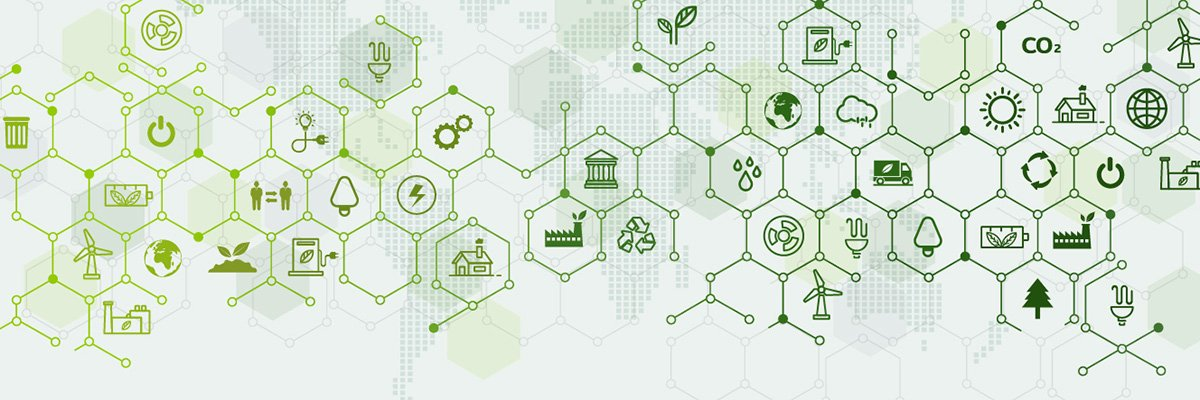
## Stage 2: Data exploration and visualization

***

### Notebook Contents:
0. Introduction
1. Notebook setup - libraries and data import, notes on the data source
2. Global data overview
3. Feature/column abbreviations and units
4. Definition of the hypothesis to be tested
5. Feature engineering
    - features overview
    - derivation of additional important features
    - removal of unnecessary features
6. Prepare the visualization
7. Create plots
    - a global look onto all relationships and detailed plots of chosen dependencies
    - correlation matrix heatmaps
    - scatterplots, histograms
    - detection of outliers
    - discussion of dependencies and trends
8. Conclusions

***

### 1. Import libraries and dataset :

In [32]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

### 2. Global overview of the available data

A global overview of the imported data yields the following insights:

In [33]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [34]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


,0
country,object
year,int64
cereal_yield,float64
fdi_perc_gdp,float64
en_per_gdp,float64
en_per_cap,float64
co2_ttl,float64
co2_per_cap,float64
co2_per_gdp,float64
pop_urb_aggl_perc,float64


In [35]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [36]:
print("Descriptive statistics:")
data.describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
year,1700.0,1.999571e+03,5.143070e+00,1.991000e+03,1.995000e+03,2.000000e+03,2.004000e+03,2.008000e+03
cereal_yield,1700.0,3.013318e+03,1.796206e+03,1.757000e+02,1.683365e+03,2.584800e+03,3.933400e+03,8.410800e+03
fdi_perc_gdp,1700.0,2.948940e+00,3.949722e+00,-1.502768e+01,8.341052e-01,1.993220e+00,3.702149e+00,5.137395e+01
en_per_gdp,1700.0,2.498227e+02,1.861950e+02,6.633537e+01,1.363205e+02,1.976249e+02,2.864749e+02,1.383380e+03
en_per_cap,1700.0,1.968980e+03,1.959420e+03,1.165115e+02,5.428828e+02,1.089226e+03,2.893996e+03,1.260784e+04
co2_ttl,1700.0,9.793999e+05,3.235692e+06,7.077310e+02,1.462125e+04,7.728386e+04,3.708446e+05,3.064936e+07
co2_per_cap,1700.0,4.676663e+00,4.906273e+00,2.941071e-02,9.227695e-01,3.093346e+00,7.441195e+00,3.710650e+01
co2_per_gdp,1700.0,4.823038e+02,3.921922e+02,4.555259e+01,2.571396e+02,3.684156e+02,5.869730e+02,3.343454e+03
pop_urb_aggl_perc,1700.0,2.148013e+01,1.210516e+01,3.526316e+00,1.238395e+01,1.852596e+01,2.898832e+01,6.050578e+01
prot_area_perc,1700.0,1.220179e+01,9.116682e+00,0.000000e+00,5.839844e+00,1.029379e+01,1.659930e+01,5.374983e+01


### 3. Used feature/column abbreviations

The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

<table>
    <tr>
        <td> <b> Variable name </b> </td>
        <td> <b> Description </b> </td>
        <td> <b> Unit </b> </td>
    </tr>
    <tr>
        <td> cereal_yield </td>
        <td> Cereal yield </td>
        <td> kg per hectare </td>
    </tr>
    <tr>
        <td> fdi_perc_gdp </td>
        <td> Foreign direct investment, net inflows </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> en_per_gdp </td>
        <td> Energy use per units of GDP </td>
        <td> kg oil eq./\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> en_per_cap </td>
        <td> Energy use per capita </td>
        <td> kilograms of oil equivalent </td>
    </tr>
    <tr>
        <td> co2_ttl </td>
        <td> CO2 emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> co2_per_cap </td>
        <td> CO2 emissions per capita </td>
        <td> metric tons </td>
    </tr>
    <tr>
        <td> co2_per_gdp </td>
        <td> CO2 emissions per units of GDP </td>
        <td> kg/\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> pop_urb_aggl_perc </td>
        <td> Population in urban agglomerations >1million </td>
        <td> % </td>
    </tr>
    <tr>
        <td> prot_area_perc </td>
        <td> Nationally terrestrial protected areas </td>
        <td> % of total land area </td>
    </tr>
    <tr>
        <td> gdp </td>
        <td> Gross Domestic Product (GDP) </td>
        <td> \$ </td>
    </tr>
    <tr>
        <td> gni_per_cap </td>
        <td> GNI per capita </td>
        <td> Atlas \$ </td>
    </tr>
    <tr>
        <td> under_5_mort_rate </td>
        <td> Under-five mortality rate </td>
        <td> per 1,000 </td>
    </tr>
    <tr>
        <td> pop_growth_perc </td>
        <td> Population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> pop </td>
        <td> Population </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> urb_pop_growth_perc </td>
        <td> Urban population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> urb_pop </td>
        <td> Urban population </td>
        <td> 1 </td>
    </tr>
    
</table>

#### 🌍 Global Average CO₂ Emissions per Capita Over Time – Chart Explanation

This line chart shows the **global average CO₂ emissions per capita** (in metric tons) from **1991 to 2008**.

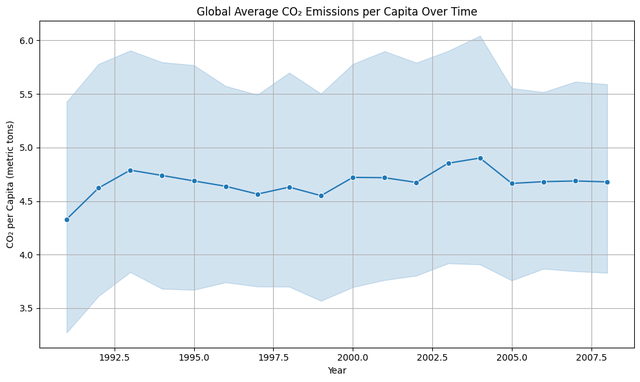

In [37]:
# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

📈 **Key Components**

- **Blue Line with Markers**:  
  Represents the **mean CO₂ emissions per capita** globally for each year.

- **Shaded Blue Area (Confidence Band)**:  
  Indicates the **variation or uncertainty** (e.g., standard deviation or confidence interval) around the average.  
  A wider band means greater variability among countries in that year.

---

> 🧠 **Insights from the Chart**

1. **Overall Stability with Minor Fluctuations**  
   The global average remains relatively stable over time, ranging between **4.3 and 4.9 metric tons per capita**.

2. **Slight Increase (Early 1990s to Mid-1990s)**  
   From ~4.3 in 1991 to ~4.8 in 1994, showing modest global emission growth—possibly due to economic expansion post-Cold War.

3. **Plateau & Minor Dips (Late 1990s to 2008)**  
   Emission levels hover around 4.6–4.8 with minor year-to-year changes, indicating no strong global trend up or down during this period.

4. **High Country-Level Variability**  
   The **broad shaded area** suggests significant disparities in per capita CO₂ emissions across countries—developing vs. developed economies.

Despite some fluctuations, **global per capita CO₂ emissions remained largely steady** between 1991 and 2008, averaging ~4.6 metric tons.
However, the **wide range of values among countries** reveals that this average masks stark differences in national emissions profiles.
Some countries likely increased emissions while others improved or stabilized, balancing out the global trend.

---


#### 🌐 Total CO₂ Emissions vs Population – Chart

This scatter plot illustrates the relationship between a country's **total CO₂ emissions** and its **population**.


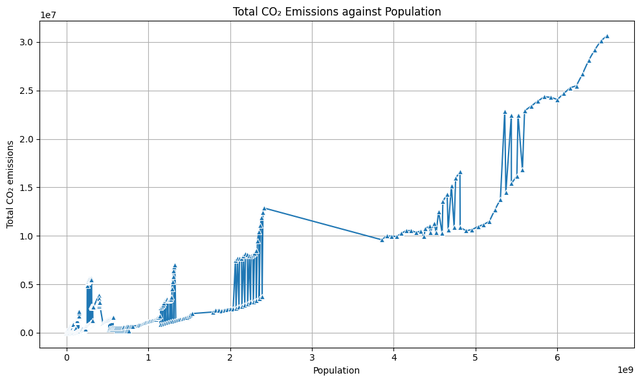

In [38]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations** 🔍

1. **Positive Correlation**  
   There's a clear trend that **countries with larger populations tend to have higher total CO₂ emissions**.

2. **Steep Jumps at Key Population Ranges**  
   Noticeable vertical bands around:
   - ~1–1.5 billion (likely China)
   - ~1–1.4 billion (likely India)
   - ~300–400 million (e.g., USA)
   These could represent individual countries contributing large emissions due to both high population and industrial activity.

3. **High Variability at Similar Populations**  
   Some vertical streaks show countries with **similar populations but vastly different CO₂ emissions**, likely due to:
   - Differences in industrialization
   - Energy sources (renewable vs fossil fuels)
   - Economic structure and development

4. **Discontinuities or Gaps**  
   The sudden drops between points might indicate:
   - Missing data for some countries
   - Uneven time steps
   - Jumps between countries with very different sizes or emission levels


The chart strongly suggests that **population size is a significant driver of total CO₂ emissions**. However, **emissions per person can vary widely**, as countries with similar populations show vastly different total CO₂ outputs. This highlights the importance of not just population, but also energy policy, industrialization, and carbon efficiency when analyzing emissions data.

### 4. Hypothesis Definition

The dataset includes various country-level features categorized as:

- 🌍 **Emissions**: CO₂, CH₄, N₂O, etc.  
- 👥 **Population metrics**: total population, urban %, growth  
- 💰 **Economic indicators**: GDP, GNI, FDI  
- 🌾 **Land use**: cereal yield, agricultural land, protected areas  
- 🌦️ **Climate data**: precipitation, natural disasters  
- ⚡ **Energy use**  
- 🏥 **Health metrics**: medical personnel count  
- ...and others

---

#### 🎯 Project Goal

To explore how factors like economy, energy use, and land use influence emissions and climate indicators. Ultimately, develop a **predictive ML model** for emissions or climate data using the above features.

---

#### 📌 Hypothesis

> **CO₂ emissions are influenced by country-specific features** such as energy use, population metrics, GDP, FDI, and land use — and can be predicted from them.

In this study, **CO₂ emissions** will be treated as the **dependent variable**, and we’ll assess how it relates to other available features.

---

_Note: Some features were excluded due to high missingness during preprocessing._


***
### 5. Feature engineering

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

   - per capita: *co2_per_cap* and *en_per_cap*
   - per unit of GDP: *co2_per_gdp* and *en_per_gdp*
   - total values: *co2_ttl*

Since the energy use is not available as a total value, an additional column will be derived by multiplying the value referred to a unit of GDP *'en-er_gdp'* with the column *'gdp'* and dividing by 1000 (The energy use per unit of GDP is defined in the dataset documentation as the energy use in kilograms of oil equivalent per  \\$1000 of GDP [kg oil eq./\\$1,000]).

Create a column for the total energy use:

In [39]:
# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

### Choosing the Best Unit for CO₂ Emissions & Energy Use

To determine the most meaningful unit for **CO₂ emissions** and **energy use**, we analyze their **correlations** with other variables.

🔍 **Goal**: Identify the units (e.g., per capita, total, per GDP) that show the **strongest and broadest correlations** with other country-level features.

This is achieved by examining the **correlation matrix** of all variables.


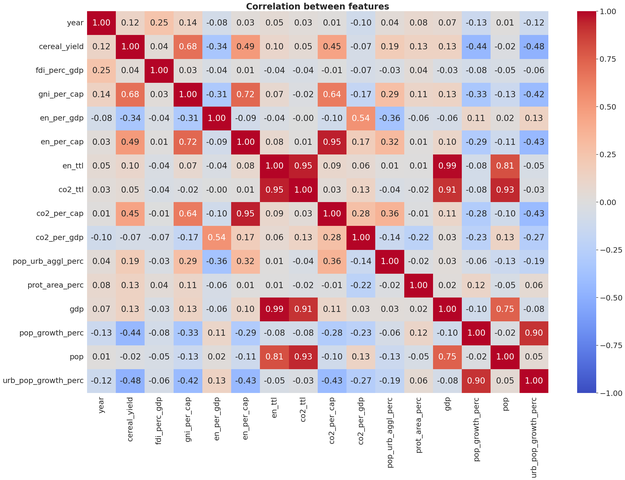

In [40]:
# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
# correlation matrix
sns.set_theme(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt = ".2f",
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set_theme(font_scale=1)


- When comparing the dependencies of co2_ttl, co2_per_cap, and co2_per_gdp with other features, **co2_per_cap** shows stronger correlations with more variables.

- It also reflects CO₂ emissions independent of population size, making it more useful for comparing countries of different sizes and populations.

- Since most chosen variables are already linked to population, including pop (population count) adds little value — this is also supported by its low correlation.

Based on this, the following features will be excluded from further analysis due to weak correlations: pop = -0.1, en_per_gdp = -0.1, en_ttl = 0.09, co2_per_gdp, and co2_ttl = 0.03.

In [41]:
features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]


vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns # Use the columns from the features_for_vif DataFrame
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])] # Use the values and number of columns from features_for_vif
print(vif_data)

               feature        VIF
0         cereal_yield   1.528133
1         fdi_perc_gdp   0.971334
2          gni_per_cap   2.910812
3           en_per_cap  12.579371
4          co2_per_cap  10.762323
5    pop_urb_aggl_perc   0.979676
6       prot_area_perc   1.022400
7                  gdp   1.106440
8      pop_growth_perc   6.336530
9  urb_pop_growth_perc   5.808288


VIF values measure how much a feature's variance is inflated due to multicollinearity with other features:

- VIF < 5 → Low multicollinearity (generally safe)

- VIF 5–10 → Moderate multicollinearity (potential issue)

- VIF > 10 → High multicollinearity (problematic, should consider dropping or combining)

In [42]:
features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

***

## 6. Prepare the visualizations

### Plotting preparation

#### Ensure easier labeling of the plots
In order to make the labeling of the variables within plots easier in the code, a dictionary with the column names and variable labels to use on axes is defined:

In [43]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

#### Choose a subset of countries to plot
The big amount of data points will result in slower processing of the plot and in a less clear representation. This can be avoided by choosing roughly half of the countries just for the paired scatter plot:

In [44]:
# get unique values in country column

unique_countries = data['country'].unique()
unique_countries

array(['AGO', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'BGD', 'BGR', 'BLR',
       'BOL', 'BRA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG',
       'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECA', 'ECU',
       'EGY', 'EMU', 'ESP', 'ETH', 'FIN', 'FRA', 'GBR', 'GHA', 'GRC',
       'GTM', 'HND', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KOR', 'LAC', 'LIC', 'LMC', 'LMY',
       'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA', 'NLD', 'NZL',
       'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROM', 'RUS',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR', 'TGO',
       'THA', 'TUR', 'TZA', 'UKR', 'UMC', 'URY', 'USA', 'UZB', 'VEN',
       'VNM', 'WLD', 'YEM', 'ZAF', 'ZAR', 'ZMB'], dtype=object)

#### CO₂ Emissions per Capita Over Time (Selected Countries)

This line chart illustrates the **CO₂ emissions per capita** (in metric tons) over time for five selected countries: **India (IND), New Zealand (NZL), Pakistan (PAK), USA, and Russia (RUS)**, spanning from the early 1990s to 2008.


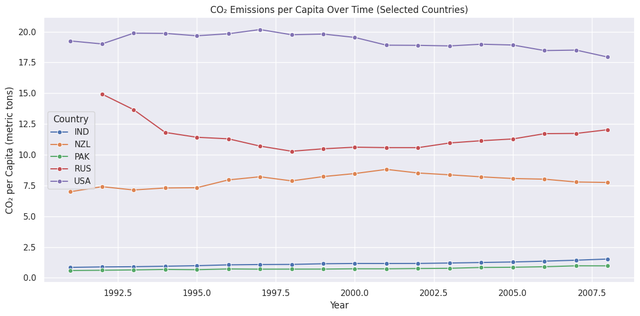

In [45]:
# Select countries to compare
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']

# Use the correct DataFrame variable 'data' and column names 'country', 'year', and 'co2_per_cap'
df_selected = data[data['country'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
# Use the correct DataFrame variable 'df_selected' and column names 'year' and 'co2_per_cap' for plotting
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

Key Observations:
- **USA** consistently records the highest per capita emissions, hovering around **19–20 metric tons**, though it shows a slight decline toward the end.
- **Russia (RUS)** shows a significant **decline in the early 1990s**, likely due to economic restructuring, and then stabilizes around **11–12 metric tons**.
- **New Zealand (NZL)** maintains a mid-level range, peaking around **9 metric tons**, then gradually declining.
- **India (IND)** and **Pakistan (PAK)** have the **lowest emissions per capita**, though both show **gradual upward trends**, indicating growing emissions with development.

#### Insight:
This comparison highlights stark differences in per capita emissions across developed and developing nations, and underscores the increasing trend in emissions for emerging economies like India and Pakistan.


In [46]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

***

## 7. Create plots and visualizations

The visualization is organized in a way that global overview of the data and dependencies is presented first, followed by more and more detailed representations of the more relevant relationships.

### A global look onto all relationships

Scatter plots of all chosen variables and countries will give a first impression of possible trends:

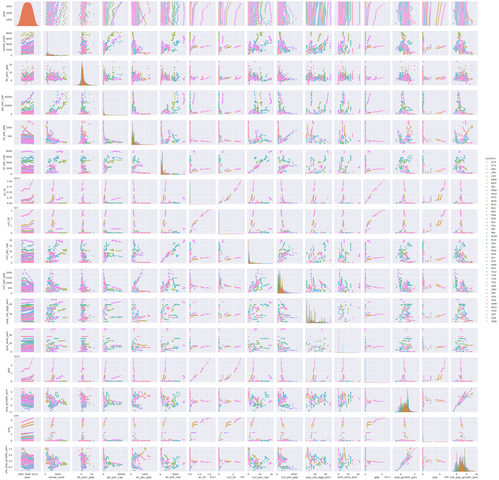

In [47]:
sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

The most obvious linear dependency of co2_per_cap is with en_per_cap. Apparent hints for nonlinear relationships can be observed in the plots of *co2_per_cap* versus *gni*, *pop_urb_aggl_perc*, *pop_growth_perc*, *urb_pop_growth_perc*.




#### Notable Outliers: United Arab Emirates

Another significant observation is the cluster of orange outlier points with CO₂ emissions per capita ranging between **25 and 40 metric tons**, all attributed to the **United Arab Emirates (ARE)**. While there are other country-specific outliers, they do not substantially impact the overall trend.

To enhance clarity, **ARE data points were removed**, and the updated plots are presented below:


In [48]:
# choose features and label columns
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

# Keep as DataFrame for filtering
features_for_plot = data[feature_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# remove the ARE outliers from the DataFrame used for plotting
features_for_plot = features_for_plot[features_for_plot['country']!='ARE']

After removing the outliers of a single country, the trends have become even more visible.

The following plot shows the relationsip between 4 variables:

Text(115.34385937499995, 0.5, 'CO2 emissions per capita [t]')

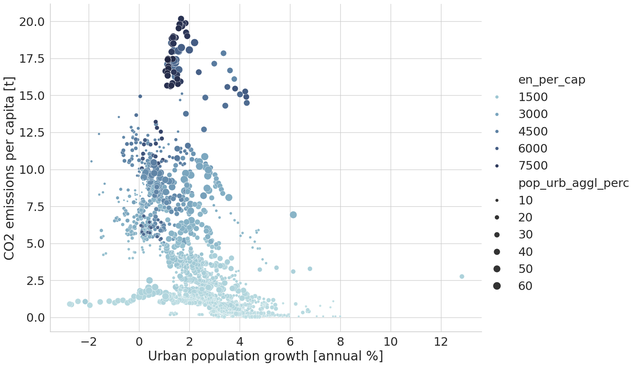

In [49]:
# 4d plot

sns.set_theme(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot, # Use the DataFrame specifically prepared for plotting
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])

***

#### **Conclusions**

Targeted plotting of key relationships has provided useful insights for predictive analysis:

* CO₂ emissions and energy use per capita are linked to more features and will be kept for further analysis.

* Population count is no longer relevant and will be removed.

* CO₂ emissions per capita show a strong linear relationship with energy use and nonlinear patterns with other variables.

* Both country-specific and overall global trends are visible. In some cases, global trends split into different paths for clusters of countries.

* Outlier groups, especially those from the United Arab Emirates (ARE), stand out from global patterns and should be considered when selecting data.

* The nonlinear nature of most relationships and the presence of country-based clusters suggest using machine learning models that handle nonlinearities and grouped data well (e.g., Random Forest), rather than those suited for purely linear patterns (e.g., Linear Regression).

***


## 🌿 Week 2: Data Exploration & Visualization – Goal

To explore, visualize, and understand patterns in the cleaned climate dataset to prepare it for predictive modeling under the Edunet–Shell AICTE Green AI Internship.


### 🔍 Missing Value Visualization

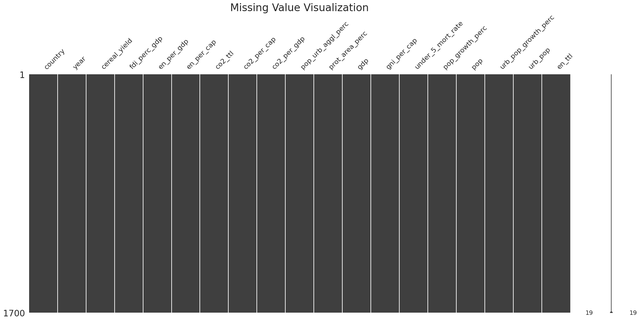

In [50]:

import missingno as msno

# Visualizing missing values using a matrix
msno.matrix(data)
plt.title('Missing Value Visualization')
plt.show()


### 🚩 Outlier Detection with Boxplots

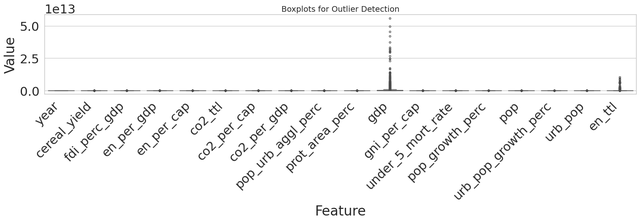

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
df_numerical = data[numerical_features]

# Melt the DataFrame for Seaborn
df_melted = df_numerical.melt(var_name='Feature', value_name='Value')

# Create boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted, linewidth=1, fliersize=3)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots for Outlier Detection', fontsize=14)
plt.tight_layout()
plt.show()


### 🔗 Correlation Heatmap

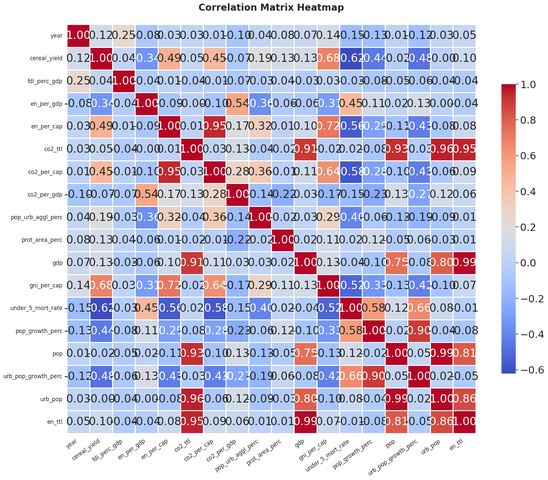

In [52]:
# Correlation Heatmap with best readability
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(18, 16))  # much bigger for clarity

heatmap = sns.heatmap(
    numeric_data.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=1,
    square=True,
    cbar_kws={"shrink": 0.6}
)

# make x/y tick labels clearer
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35, ha='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

plt.title('Correlation Matrix Heatmap', fontsize=20, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()


### 🌼 Pairplot for Feature Relationships

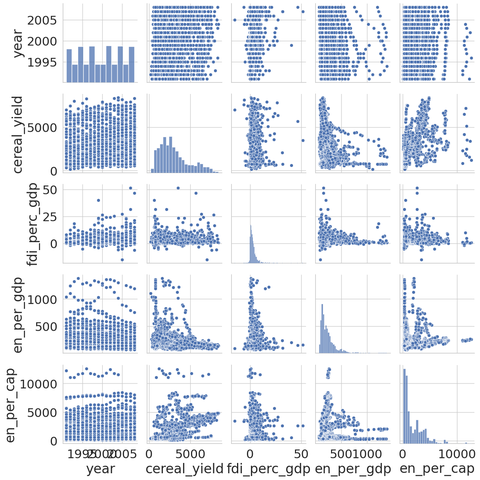

In [53]:

# Pairplot for selected features
selected_features = numerical_features[:5]  # you can customize this
sns.pairplot(data[selected_features])
plt.show()


### 🧩 Variance Inflation Factor (VIF) for Multicollinearity

In [54]:

# VIF Calculation for Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.select_dtypes(include=['float64', 'int64']).dropna()
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


               Variable         VIF
0                  year    0.000226
1          cereal_yield    2.512125
2          fdi_perc_gdp    1.025851
3            en_per_gdp    2.908910
4            en_per_cap   14.918154
5               co2_ttl  155.155950
6           co2_per_cap   13.536806
7           co2_per_gdp    3.185816
8     pop_urb_aggl_perc    1.541582
9        prot_area_perc    1.153890
10                  gdp  156.180817
11          gni_per_cap    4.018035
12    under_5_mort_rate    4.236600
13      pop_growth_perc    6.855911
14                  pop  101.043535
15  urb_pop_growth_perc    7.687731
16              urb_pop  199.343786
17               en_ttl  334.499935



## ✅ Key Insights from Week 2 Exploration

- Identified missing values for potential imputation before modeling.
- Outliers detected in certain numerical features, informing us to consider scaling or transformation.
- Correlation analysis highlights strong relationships between certain features (e.g., fossil fuel use and CO₂ emissions).
- Pairplots reveal patterns and potential clusters within the data.
- VIF analysis highlights multicollinearity concerns, helping in feature selection for modeling.

These insights prepare us for Week 3: Model Preparation and Prediction under the Edunet–Shell Green AI Internship.


# 📅 Week 3 Summary: Model Building and Prediction
- 🔹 Implemented train-test split on selected features
- 🔹 Used Random Forest for regression modeling
- 🔹 Evaluated using MSE and R² score


# Week 3: Model Building & Prediction 🌿

In this notebook:
✅ Loaded cleaned dataset  
✅ Split data into train and test  
✅ Trained Random Forest model  
✅ Evaluated performance using RMSE, MAE, R²  
✅ Saved the trained model for Week 4 deployment  


### Import Essential Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import time

# Set global plot style
sns.set(style='whitegrid')

# Ensures reproducibility
random_state_num = 42


### Load Cleaned Dataset

In [56]:
# Replace with your cleaned dataset path if needed
data = pd.read_csv('data_cleaned.csv')
print("Dataset loaded successfully.")
data.head()


Dataset loaded successfully.


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


### Prepare Features and Target Variable

In [57]:
# ✅ Replace with your actual target column
target_column = 'co2_per_cap'  # predicting CO2 emissions per capita

X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_num)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1360
Testing samples: 340


### Model Initialization and Training

In [58]:
# Correct target column
target_column = 'co2_per_cap'  # or your actual numeric target

# Prepare X and y
X = data.drop(columns=[target_column]).select_dtypes(include=['number'])
y = data[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state_num
)

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")

# Train model
start_time = time.time()

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=random_state_num,
    n_jobs=-1
)

rf.fit(X_train, y_train)

end_time = time.time()
print(f"✅ Model training completed in {end_time - start_time:.2f} seconds 🚀")


✅ Training samples: 1360
✅ Testing samples: 340
✅ Model training completed in 1.51 seconds 🚀


### Prediction and Model Evaluation

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5  # compute RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 0.5876
✅ MAE: 0.2198
✅ R² Score: 0.9837


### Actual vs Predicted Visualization

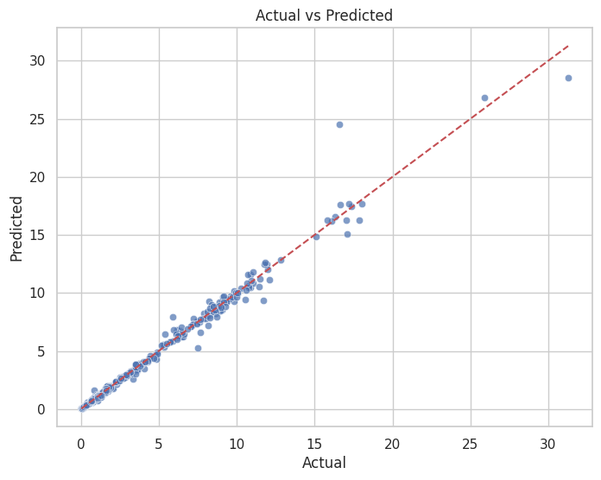

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### Feature Importance

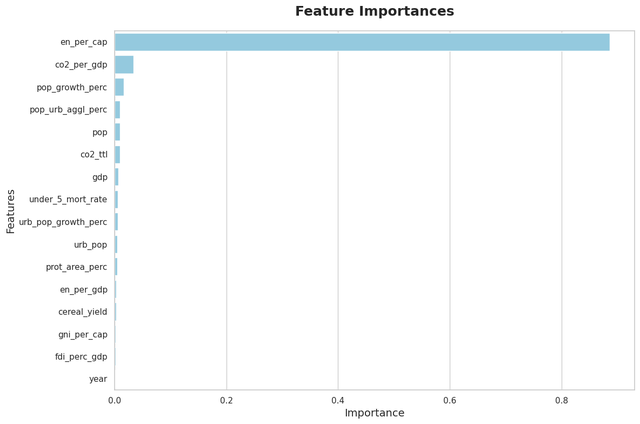

In [61]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X.columns[indices], color="skyblue")
plt.title('Feature Importances', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()


### Cross-validation (5-Fold) for Robust Evaluation

In [62]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R² score:", np.mean(cv_scores))


Cross-validation R² scores: [0.78277137 0.70844284 0.6383411  0.89419698 0.91469144]
Mean CV R² score: 0.7876887454503776
